In [ ]:
# 필요한 라이브러리
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [42]:
1. 파일 불러오기
df = pd.read_csv('./heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [43]:
# 2. 결측값 확인
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
# 3. 데이터 분할
from  sklearn.model_selection import train_test_split

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  #   클래스 비율을 유지
)

X_train.shape

(242, 13)

In [45]:
# 4. 모델 구성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 입력층
    Dense(32, activation='relu'),                                    # 은닉층
    Dense(1, activation='sigmoid')                                 # 출력층 (이진 분류)  #sigmoid 확인하기  
])

C:\Users\leehy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# 5.모델 컴파일
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [47]:
#6. 모델 훈련
history = model.fit(
    X_train, y_train,
    epochs=20,         #한번에 도는 수
    batch_size=16,     #한번에 몇개
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.5286 - loss: 18.7456 - val_accuracy: 0.4286 - val_loss: 8.1275
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5251 - loss: 4.1194 - val_accuracy: 0.5714 - val_loss: 1.1116
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5630 - loss: 1.3685 - val_accuracy: 0.7143 - val_loss: 0.7364
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6502 - loss: 0.9381 - val_accuracy: 0.6939 - val_loss: 0.7544
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6129 - loss: 1.0198 - val_accuracy: 0.5510 - val_loss: 1.1204
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5293 - loss: 1.4827 - val_accuracy: 0.6327 - val_loss: 0.8173
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5922 - loss: 0.8078 - val_accuracy: 0.7347 - val_loss: 0.5821
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6083 - loss: 0.7825 - val_accuracy: 0.6735 - 

In [48]:
# 7.모델 평가(손실도. 정확도)
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8197


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000016D18276020> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Accuracy: 0.819672131147541
F1 Score: 0.8405797101449275
Precision: 0.7837837837837838
Recall: 0.90625
Specificity: 0.72


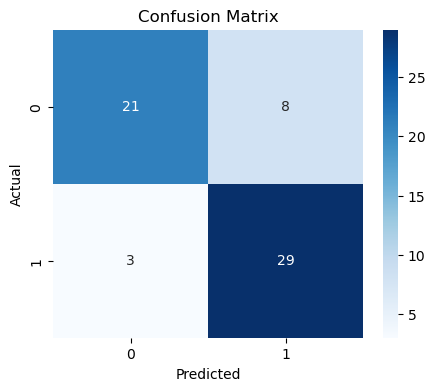

In [49]:
# 결과 확인(지표)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 예측
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# 기본 지표 출력
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Specificity 계산
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.2f}")

# 시각화
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
